# 4.8 - Keşifsel Veri Analizi: Özellik Mühendisliği 2
Bu ödevde ABD Eğitim Sistemi'ne ait verileri inceleyemeye devam edeceksiniz. Öncelikle bir önceki derste uyguladağınız eksik değerleri tamamlama tekniklerinden en uygun olanını uygulayın. Aşağıdaki sorulara cevap verebilmeniz için eksik verilerin üstesinden gelmelisiniz.<br>

1) Veri kümesindeki notların ağırlıklı ortalamasını içeren bir değişken oluşturun. <b>Dördüncü sınıftaki öğrencilerin sayısı ile sekizinci sınıftaki öğrencilerin sayısı farklı. Bu yüzden ağırlıklı ortalamaya ihtiyacınız olacak!</b>

2) Yeni oluşturduğunuz değişken ile harcama çeşitlerinin korelasyonu nedir? Hangi harcama kaleminin korelasyonu diğerlerine göre fazladır?

3) Şimdi dört harcama kalemi için Temel Bileşenler Analizi (PCA) uygulayın! Toplam varyansın ne kadarı ilk bileşen tarafından açıklanabilmektedir?

4) Oluşturduğunuz genel not ortalaması ve ilk temel bileşen arasındaki korelasyon nedir?

5) Modeliniz için en uygun değişkenleri seçmeniz gerektiğinde, harcama kalemlerinin yerine ilk temel değişkenleri tercih eder miydiniz? Neden?

---
## Cevap 1:
1) Veri kümesindeki notların ağırlıklı ortalamasını içeren bir değişken oluşturun.

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings; warnings.filterwarnings("ignore")
import seaborn as sns; sns.set(style="whitegrid")

pd.options.display.float_format = "{:.2f}".format
plt.rcParams["figure.dpi"] = 100    # https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html#customizing-with-matplotlibrc-files

education = pd.read_csv("states_all.csv")
education.iloc[:, -4:]

,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,208.00,252.00,207.00,nan
1,nan,nan,nan,nan
2,215.00,265.00,209.00,nan
3,210.00,256.00,211.00,nan
4,208.00,261.00,202.00,nan
...,...,...,...,...
1710,247.00,287.00,224.00,262.00
1711,240.00,286.00,220.00,266.00
1712,231.00,272.00,213.00,256.00
1713,242.00,289.00,220.00,267.00


In [133]:
for i in education.columns[-4:]:
    fill_with = education[i].interpolate(method="linear")
    education[i] = education[i].fillna(fill_with, inplace=False)

In [134]:
weight0 = 0

for i in education.columns[-4:]:
    print(f"{i} değişkenindeki not-null değer sayısı:", education[i].notnull().sum())
    weight0 += education[i].notnull().sum()
print("\nToplam değer sayısı:", weight0)

AVG_MATH_4_SCORE değişkenindeki not-null değer sayısı: 1715
AVG_MATH_8_SCORE değişkenindeki not-null değer sayısı: 1715
AVG_READING_4_SCORE değişkenindeki not-null değer sayısı: 1715
AVG_READING_8_SCORE değişkenindeki not-null değer sayısı: 1409

Toplam değer sayısı: 6554


In [135]:
weight1 = education["AVG_MATH_4_SCORE"].notnull().sum() / weight0
weight2 = education["AVG_MATH_8_SCORE"].notnull().sum() / weight0
weight3 = education["AVG_READING_4_SCORE"].notnull().sum() / weight0
weight4 = education["AVG_READING_8_SCORE"].notnull().sum() / weight0

education["WEIGHTED_SCORE"] = ((weight1 * education["AVG_MATH_4_SCORE"]) + 
                               (weight2 * education["AVG_MATH_8_SCORE"]) + 
                               (weight3 * education["AVG_READING_4_SCORE"]) + 
                               (weight4 * education["AVG_READING_8_SCORE"]))
education.iloc[::200, -5:]

,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,WEIGHTED_SCORE
0,208.00,252.00,207.00,nan,nan
200,221.65,270.39,217.88,nan,nan
400,217.18,264.25,214.86,260.14,238.12
600,230.00,272.00,216.00,261.00,243.99
800,245.00,285.00,226.00,268.00,255.44
1000,233.00,274.00,208.00,256.00,242.13
1200,244.00,286.00,227.00,269.00,255.92
1400,239.00,278.00,224.00,265.00,250.87
1600,245.00,268.80,227.14,270.14,251.96


---
## Cevap 2:
2) Yeni oluşturduğunuz değişken ile harcama çeşitlerinin korelasyonu nedir? Hangi harcama kaleminin korelasyonu diğerlerine göre fazladır?

In [155]:
weighted_corr = education.corr().loc["INSTRUCTION_EXPENDITURE":"CAPITAL_OUTLAY_EXPENDITURE", "WEIGHTED_SCORE"]
pd.DataFrame(weighted_corr)

,WEIGHTED_SCORE
INSTRUCTION_EXPENDITURE,0.11
SUPPORT_SERVICES_EXPENDITURE,0.12
OTHER_EXPENDITURE,0.08
CAPITAL_OUTLAY_EXPENDITURE,0.02


Yukarıdaki tablodan, "<b>SUPPORT_SERVICES_EXPENDITURE</b>" değişkeninin, "**WEIGHTED_SCORE**" değişkeni ile olan korelasyonu diğer harcama türlerine göre daha yüksektir.

---
## CEVAP 3:
3) Şimdi dört harcama kalemi için Temel Bileşenler Analizi (PCA) uygulayın! Toplam varyansın ne kadarı ilk bileşen tarafından açıklanabilmektedir?

In [159]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

title_font = {'family': 'serif', 'color': 'darkred','weight': 'bold','size': 16}
axis_font  = {'family': 'arial', 'color': 'darkblue','weight': 'normal','size': 12}

In [148]:
edu_df = pd.concat([education.iloc[:,9:13], education.iloc[:, -1]], axis=1)
edu_df.iloc[::200, :]

,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,WEIGHTED_SCORE
0,1481703.00,735036.00,nan,174053.00,nan
200,3078586.00,1833862.00,265076.00,785601.00,nan
400,13486659.00,7594544.00,1306137.00,3970379.00,238.12
600,971700.00,525727.00,64258.00,31360.00,243.99
800,10202242.00,6930905.00,876199.00,2595974.00,255.44
1000,1744548.00,1124390.00,140296.00,616478.00,242.13
1200,2446701.00,1102622.00,183067.00,449287.00,255.92
1400,nan,nan,nan,nan,250.87
1600,nan,nan,nan,nan,251.96


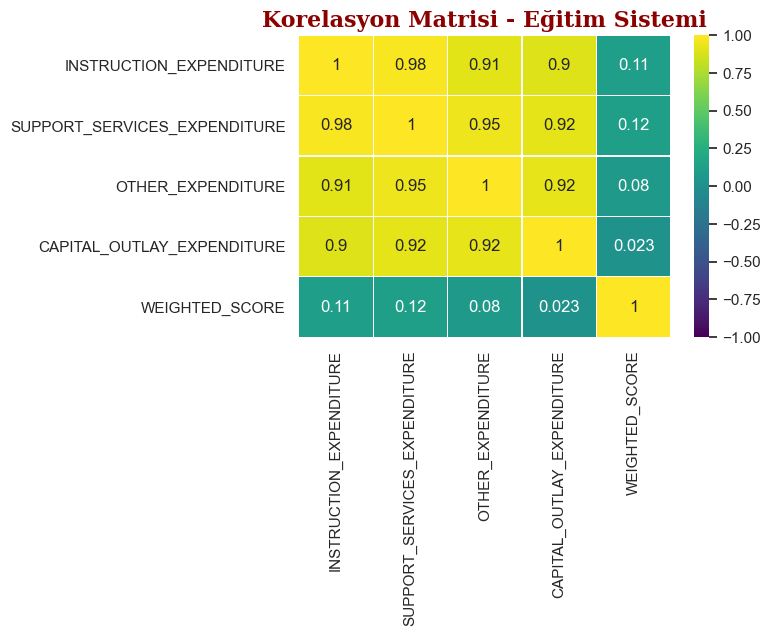

In [157]:
edu_corr = edu_df.corr()

#plt.figure(figsize=(12,12))
sns.heatmap(edu_corr, annot=True, linewidths=.1, vmin=-1, vmax=1, cmap='viridis')
plt.title("Korelasyon Matrisi - Eğitim Sistemi", fontdict = title_font)
plt.show()

In [165]:
edu_df = edu_df.dropna()

X = StandardScaler().fit_transform(edu_df)    # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.fit_transform
Xt = X.T
Cx = np.cov(Xt)

print("Kovaryans Matrisi:", end="")
display(pd.DataFrame(Cx))

Kovaryans Matrisi:

,0,1,2,3,4
0,1.00,0.98,0.91,0.89,0.11
1,0.98,1.00,0.96,0.92,0.12
2,0.91,0.96,1.00,0.93,0.08
3,0.89,0.92,0.93,1.00,0.02
4,0.11,0.12,0.08,0.02,1.00


In [182]:
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)
# Inspecting the eigenvalues and eigenvectors.

for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].T
    print("Eigenvector {}: \n{}".format(i + 1, eigvec_cov))
    print("Eigenvalue  {}: {}".format(i + 1, eig_val_cov[i]))
    print(60 * "-")

Eigenvector 1: 
[-0.49827178 -0.50763924 -0.49928025 -0.49103981 -0.06022269]
Eigenvalue  1: 3.8008982725950897
------------------------------------------------------------
Eigenvector 2: 
[-0.00232309 -0.00860536  0.0352105   0.09743056 -0.99457934]
Eigenvalue  2: 0.9972243792035487
------------------------------------------------------------
Eigenvector 3: 
[-0.5135495   0.79143279 -0.328932    0.03903006 -0.0134697 ]
Eigenvalue  3: 0.013275326439916685
------------------------------------------------------------
Eigenvector 4: 
[-0.61974713 -0.31488205  0.28452522  0.65547902  0.07845665]
Eigenvalue  4: 0.12037330450947895
------------------------------------------------------------
Eigenvector 5: 
[ 0.3223356  -0.12927403 -0.74855099  0.56410203  0.02912544]
Eigenvalue  5: 0.0733940065081659
------------------------------------------------------------


In [183]:
print("Veri kümesindeki toplam varyans yüzdesi\n", "(Elle hesaplanan bileşen)\n", 
      eig_val_cov / sum(eig_val_cov))

Veri kümesindeki toplam varyans yüzdesi
 (Elle hesaplanan bileşen)
 [0.75939516 0.19923905 0.00265233 0.02404982 0.01466365]


### Toplam varyansın %76'sı ilk bileşen tarafından açıklanabilmektedir.

Veri kümesindeki toplam varyans yüzdesi Elle hesaplanan bileşen.
 [0.75939516 0.19923905 0.02404982 0.01466365 0.00265233]


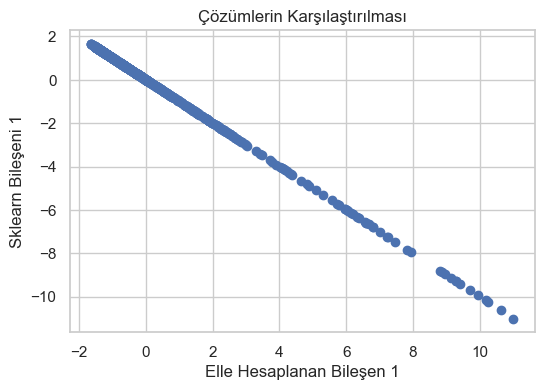

In [213]:
sklearn_pca = PCA(n_components=5)
Y_sklearn = sklearn_pca.fit_transform(X)

P = eig_vec_cov[:, 0]

Y = P.T.dot(Xt)

print(
    'Veri kümesindeki toplam varyans yüzdesi',
    'Elle hesaplanan bileşen.\n',
    sklearn_pca.explained_variance_ratio_
)

# Compare the sklearn solution to ours – a perfect match.
plt.plot(Y_sklearn[:, 0], Y, 'o')
plt.title('Çözümlerin Karşılaştırılması')
plt.ylabel('Sklearn Bileşeni 1')
plt.xlabel('Elle Hesaplanan Bileşen 1')
plt.show()

In [208]:
pd.DataFrame(P)

,0
0,-0.50
1,-0.51
2,-0.50
3,-0.49
4,-0.06


In [209]:
pd.DataFrame(Y)

,0
0,0.87
1,1.49
2,0.83
3,1.25
4,-4.38
...,...
964,-0.71
965,-0.83
966,1.06
967,-0.12


In [210]:
pd.DataFrame(Y_sklearn)

,0,1,2,3,4
0,-0.87,1.37,-0.02,-0.20,0.10
1,-1.49,1.34,0.09,0.03,-0.02
2,-0.83,1.42,-0.11,0.01,0.01
3,-1.25,1.39,0.08,-0.08,0.03
4,4.38,2.14,-0.02,-0.21,0.08
...,...,...,...,...,...
964,0.71,0.70,0.42,-0.11,-0.11
965,0.83,0.82,-0.20,0.30,-0.26
966,-1.06,0.72,0.07,-0.15,0.02
967,0.12,0.84,0.12,-0.06,-0.10


In [ ]:
## "ilk temel bileşen"i dataFrame ya da bir veri seti olarak nasıl alacağımızı tam anlamadım.